# Visualize the empirical observations

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
import numpy as np

In [65]:
src = '../../data/visualization'

## Index case ratios, case proportions and outbreak sizes

In [66]:
index_case_ratios = pd.read_csv(join(src, 'index_case_ratios.csv'), delimiter=';')
case_proportions = pd.read_csv(join(src, 'case_proportions.csv'), delimiter=';')
outbreak_sizes = pd.read_csv(join(src, 'outbreak_sizes.csv'), delimiter=';')
outbreak_sizes.index = outbreak_sizes['schooltype']

In [67]:
def plot_index_case_ratio(ax, data):
    ax.bar(data['schooltype'], data['percent'] * 100,
        color='#C0392B')
    ax.tick_params(axis='x', which='major', labelsize=8)
    ax.set_ylim(0, 100)
    ax.set_ylabel('student index cases [%]', fontsize=12)
    
    for i, l in enumerate(data['label']):
        ax.text(i, 1.5, l, ha='center', color='w')
        
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [47]:
def plot_case_proportions(ax, data):
    ax.bar(data['schooltype'], data['percent'] * 100,
        color='#2471A3')
    ax.tick_params(axis='x', which='major', labelsize=8)
    ax.set_ylim(0, 100)
    ax.set_ylabel('student cases [%]', fontsize=12)
    
    for i, l in enumerate(data['label']):
        ax.text(i, 1.5, l, ha='center', color='w')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

In [48]:
def plot_outbreak_sizes(ax, data):
    width = 0.15  # the width of the bars
    x = data.loc['primary']['clustersize'].values
    stypes = ['primary', 'lower secondary', 'upper secondary', 'secondary',
              'inconclusive']
    colors = ['#2471A3', '#C0392B', '#7D3C98', '#17A589', '#839192']
    
    for stype, xpos, color in zip(stypes, [5, 4, 3, 2, 1], colors):
        ax3.bar(np.arange(len(x)) - xpos * width - 0.025, 
                    data.loc[stype]['cumulative_distribution'] * 100,
                    width, color=color, label=stype)
        
    ax.set_xticks(np.arange(-0.5, 17.6, 2))
    ax.set_xticklabels(list(range(2, 19, 2)) + ['20+'])
    ax.set_ylabel('cumulative distribution\nfunction [%]', fontsize=12)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend(loc=2, fontsize=9)
    ax.set_xlabel('cluster size')

<ipython-input-51-f98b6478f22f>:15: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout()


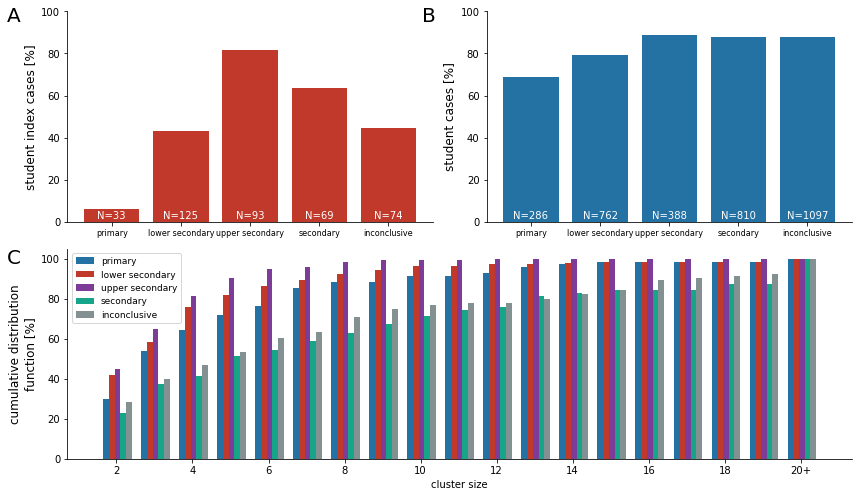

In [51]:
fig = plt.figure(constrained_layout=True, figsize=(12, 7))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0:])

plot_index_case_ratio(ax1, index_case_ratios)
plot_case_proportions(ax2, case_proportions)
plot_outbreak_sizes(ax3, outbreak_sizes)

fig.text(0.01, 0.95, 'A', fontsize=20)
fig.text(0.49, 0.95, 'B', fontsize=20)
fig.text(0.01, 0.47, 'C', fontsize=20)

fig.tight_layout()

plt.savefig('../../plots/empirical_observations/fig1.svg', transparent=True)
plt.savefig('../../plots/empirical_observations/fig1.pdf', transparent=True)

## Ratio of asymptomatic cases

In [61]:
symptom_data = pd.read_csv(join(src, 'symptomatic_proportions.csv'))
symptom_data = symptom_data.set_index('age_bracket')

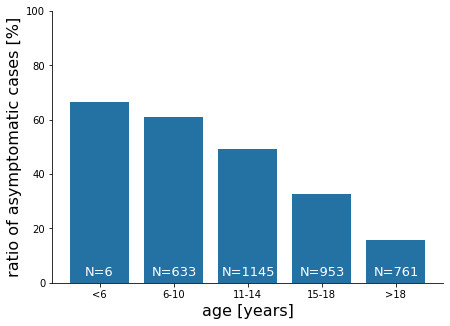

In [62]:
fig, ax = plt.subplots(figsize=(7,5))
ax.bar(symptom_data.index, symptom_data['ratio_asymptomatic'] * 100, color='#2471A3')
ax.set_ylabel('ratio of asymptomatic cases [%]', fontsize=16)
ax.set_xlabel('age [years]', fontsize=16)
for i, N, x in zip(range(5), symptom_data['count'], [0.2, 0.3, 0.35, 0.3, 0.3]):
    ax.text(i-x, 2.5, 'N={}'.format(N), fontsize=13, color='w')
    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim(0, 100)
    
plt.savefig('../../plots/empirical_observations/ratio_of_asymptomatic_cases.svg', transparent=True)
plt.savefig('../../plots/empirical_observations/ratio_of_asymptomatic_cases.pdf', transparent=True)